# Some coding practices
Han Sun

## Design Questions

### Efficiently store and calculate dot products between embeddings
- this was asked during eBay interview
<p></p>
- [leetcode source](https://leetcode.com/discuss/interview-question/286446/facebook-interview-question-representation-and-dot-product-of-two-vectors)

    A: [1, 1, 4, 4, 4, 4, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

    B: [2, 2, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [10]:
def compress_vector(A):
    if len(A) == 0:
        return []
    
    compress_A = [[A[0], 1]] # [value, count]
    for a in A[1:]:
        if a == compress_A[-1][0]:
            compress_A[-1][1] += 1
        else:
            compress_A.append([a, 1])
    return compress_A

def calculate_dot_product(A, B):
    
    compress_A = compress_vector(A)
    compress_B = compress_vector(B)
    
    i, j, dot_prod = 0, 0, 0
    len_A, len_B = len(compress_A), len(compress_B)
    while i < len_A and j < len_B:
        a, b = compress_A[i], compress_B[j]
        common = min(a[1], b[1])
        dot_prod += a[0] * b[0] * common
        
        a[1] -= common
        b[1] -= common
        
        if a[1] == 0:
            i += 1
        if b[1] == 0:
            j += 1
    return dot_prod


A = [1, 1, 4, 4, 4, 4, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
B = [2, 2, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

assert calculate_dot_product(A, B) == sum([a * b for a, b in zip(A, B)])

### Build K-means from scratch using numpy

initialized cnetrioids are [[ 4  5]
 [12  2]
 [ 2  3]]
updated cluster is [2. 0. 0. 0. 1. 1. 2. 2. 0. 0. 0. 2.]
updated cnetrioids are [[ 3  7]
 [11  2]
 [ 0  2]]
updated cluster is [2. 0. 0. 0. 1. 1. 2. 0. 0. 0. 0. 2.]
updated cnetrioids are [[ 2  7]
 [11  2]
 [ 0  0]]
updated cluster is [2. 0. 0. 0. 1. 1. 2. 0. 0. 0. 0. 2.]
updated cnetrioids are [[ 2  7]
 [11  2]
 [ 0  0]]
updated cluster is [2. 0. 0. 0. 1. 1. 2. 0. 0. 0. 0. 2.]


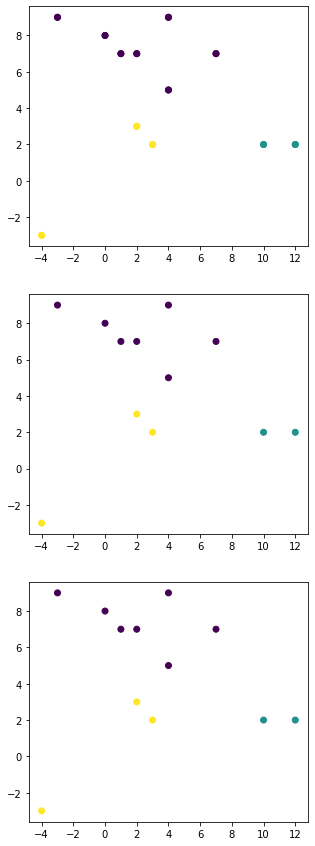

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class kMeansNumpy:
    def __init__(self, k, dim=2):
        self.k = k
        self.centriod = np.zeros((dim, k))
    
    def fit(self, X, iteration=2):
        self.X = X
        self.cluster = np.zeros(len(self.X))
        self._initialize()
        fig, axs = plt.subplots(iteration+1,figsize=(5,15))
        self._plot(axs[0])
        
        plt_counter = 0
        while iteration >= 0:
            self._update_centriod()
            self._assign_cluster()
            self._plot(axs[plt_counter])
            plt_counter += 1
            iteration -= 1
        
    def _assign_cluster(self):
        for i, x in enumerate(self.X):
            distance = []
            for c in self.centriod:
                distance.append(self._get_distance(x, c))
            self.cluster[i] = np.argmin(distance)
        print('updated cluster is {}'.format(self.cluster))
        
    def _update_centriod(self):
        for c in range(self.k):
            X = self.X[self.cluster == c,]
            self.centriod[c] = np.mean(X,axis=0)
        print('updated cnetrioids are {}'.format(self.centriod))
        
    def _get_distance(self, x, y):
        return np.linalg.norm(x-y)
    
    def _initialize(self):
        m, _ = self.X.shape
        initial_k = np.random.choice(m, self.k, replace=False)
        self.centriod = self.X[initial_k,:]
        print('initialized cnetrioids are {}'.format(self.centriod))
        self._assign_cluster()
        
    def _plot(self, axis):
        axis.scatter(x=self.X[:, 0], y=self.X[:, 1], c=self.cluster)
        
X = np.array([[2, 3], [4, 5], [7, 7], [2, 7], [10, 2], [12, 2], [3, 2], [-3, 9], [0, 8], [1, 7], [4, 9], [-4, -3]])

classifier = kMeansNumpy(3)
classifier.fit(X)

### Build K-means from scratch using PySpark
- this was asked during eBay interivew

In [15]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [ ]:
class kMeansSpark:
    def __init__(self, k):
        self.k = k
    
    def _update_cluster(self):
        pass
    
    def _assign_centriod(self):
        pass
    
    def fit(self):
        pass

### Find k-closest points to origin
- [leetcode source](https://leetcode.com/problems/k-closest-points-to-origin/)
<p></p>
- three solutions depending on problem scale: is $N$ very big? is $K$ big or small?
<p></p>

    a) use a priority queue to maintain a list of k points, $O(Nlog(k))$;
    
    b) apply sorting, $O(Nlog(N))$;
    
    c) apply kd tree, $O(Nlog(N))$ for the first time to generate the tree, search, insert, remove all takes $O(log(N))$.
<p></p>
- a good practice on heapq

In [9]:
import heapq

def find_k_closest_heap(points, k):
    candidates = []
    for x, y in points:
        dist = - x*x - y*y
        if len(candidates) == k:
            heapq.heappushpop(candidates, (dist, x, y))
        else:
            heapq.heappush(candidates, (dist, x, y))
    
    return [[x, y] for dist, x, y in candidates]


from scipy import spatial

def find_k_closest_kd_tree(points, k):
    kd_tree = spatial.KDTree(points)
    distance, idx = kd_tree.query(x=[0, 0], k=k, p=2)
    if k > 1:
        return [point for i, point in enumerate(points) if i in idx]
    else:
        return [points[idx]]
print(find_k_closest_heap([[3,3],[5,-1],[-2,4]], 2))
print(find_k_closest_kd_tree([[3,3],[5,-1],[-2,4]], 2))

[[-2, 4], [3, 3]]
[[3, 3], [-2, 4]]


### Inverse a matrix from scratch

### Check if a matrix is full rank

### Write Batch Normalization from scratch

In [8]:
import math

def batch_norm_dense(layer: list, epsilon: float, ita: float, beta: float):
    total = sum(layer)
    mu = total / len(layer)
    sigma = 0
    for ele in layer:
        sigma += (ele-mu)**2
    sigma /= len(layer)
    
    output = []
    for ele in layer:
        norm_ele = (ele - mu) / math.sqrt(sigma**2 + epsilon)
        output.append(ita * norm_ele + beta)
    return output

batch_norm_dense([1,2,3,4,5], 0.0001, 0.05, 0.3)

[0.25000062498828146,
 0.27500031249414075,
 0.3,
 0.3249996875058592,
 0.3499993750117185]

### Calculate precision, recall, AUC

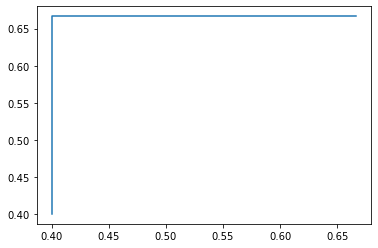

In [36]:
import matplotlib.pyplot as plt

def get_metrics(pred, true, threshold=0.5):
    pred_class = []
    for ele in pred:
        if ele >= threshold:
            pred_class.append(1)
        else:
            pred_class.append(0)
    
    TP, FN = 0, 0
    FP, TN = 0, 0
    for p, t in zip(pred_class, true):
        if t == 1:
            if p == 1:
                TP += 1
            else:
                FN += 1
        else:
            if p == 1:
                FP += 1
            else:
                TN += 1
    precision = TP / (TP + FP) if (TP+FP) else 1
    recall = TP / (TP + FN) if (TP+FN) else 1
    
    return precision, recall

def get_auc(pred, true):
    auc_pair = []
    plt.figure()
    for i in range(1, 11):
        auc_pair.append(get_metrics(pred, true, i/10))
    
    auc_pair.sort(key=lambda x: x[0])
    plt.step(auc_pair[0], auc_pair[1])

get_auc([0.7, 0.6, 0.3, 0.6, 0.1, 0.9], [1, 0, 0, 0, 1, 1])

## Algo Basics

### Sorting

In [ ]:
def quick_sort(nums):
    